# Kapitel 6

## Gradientenabsteig

Input x = 0.200000, Gewünschter Output y = 0.20
Iter	x	w	net i	a	y_hat	y	E	E'	w delta
0	0.2	-10.00	-2.00	-2.00	-2.00	0.20	2.42	-0.44	0.04
10	0.2	-9.57	-1.91	-1.91	-1.91	0.20	2.23	-0.42	0.04
20	0.2	-9.15	-1.83	-1.83	-1.83	0.20	2.06	-0.41	0.04
30	0.2	-8.75	-1.75	-1.75	-1.75	0.20	1.90	-0.39	0.04
40	0.2	-8.37	-1.67	-1.67	-1.67	0.20	1.76	-0.37	0.04
50	0.2	-8.00	-1.60	-1.60	-1.60	0.20	1.62	-0.36	0.04
60	0.2	-7.65	-1.53	-1.53	-1.53	0.20	1.50	-0.35	0.03
70	0.2	-7.31	-1.46	-1.46	-1.46	0.20	1.38	-0.33	0.03
80	0.2	-6.98	-1.40	-1.40	-1.40	0.20	1.27	-0.32	0.03
90	0.2	-6.67	-1.33	-1.33	-1.33	0.20	1.18	-0.31	0.03
100	0.2	-6.37	-1.27	-1.27	-1.27	0.20	1.09	-0.29	0.03
110	0.2	-6.08	-1.22	-1.22	-1.22	0.20	1.00	-0.28	0.03


Text(0.5, 0, 'Gewicht')

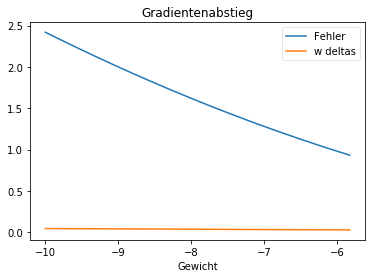

In [9]:
import matplotlib.pyplot as plt
# Ganz wichtig, sonst wird der Plot nicht angezeigt
%matplotlib inline

def func_id(x):  
        return x 

# Initialisierungen
x = 0.2
y = x
#Das ist die Lernrate
eta = 0.1
# Startgewicht
weight = -10.0
# Für den Plot
weights = []
errors = []
w_deltas = []
# Print Überschrift
print("Input x = {:.6f}, Gewünschter Output y = {:.2f}".format(x,y))
print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}"
          .format('Iter', 'x','w','net i',
                  'a','y_hat','y','E',"E'",'w delta'))
# Fixe 120 Schritte
for step in range(120):
    # Net input berechnen    
    net_i = weight * x
    # Aktivierung (identische Funktion)    
    activation = func_id(net_i)
    # Errechneter Output    
    y_hat = activation
    # Quadratischer Fehler: Gewünschter - Errechneter Output    
    error = 0.5*(y - y_hat)**2
    # Gradient    
    derivative = (-1.0)*x*(y - y_hat)
    # Delta für Gewichtsanpassung    
    w_delta = (-1)*derivative*eta
    # Daten für den Plot (weight,error)
    weights.append(weight)
    errors.append(error)
    w_deltas.append(w_delta)
    # Ausgabe der Änderungen alle 10 Schritte    
    if step % 10 == 0:
        print("{}\t{}\t{:.2f}\t{:.2f}\t{:.2f}"
              "\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}"
          .format(step, x,weight,net_i,activation,y_hat,
                  y,error,derivative,w_delta)) 
    # Dafür machen wir das alles: Gewichtsanpassung = Lernen        
    weight += w_delta

### Plot erzeugen
# Figure und Subplot
fig, ax1 = plt.subplots()
ax1.plot(weights, errors, label="Fehler")
ax1.plot(weights,w_deltas, label="w deltas")
# Titel
ax1.set_title('Gradientenabstieg')
# Legende
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.5)
# Label
plt.xlabel('Gewicht')


## MLP Backpropagation: Erste Anpassung - predict Methode

Multi Layer Perceptron - Netzwerk Architektur
[[1.000 1.000 1.000 1.000 1.000]
 [0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000]]
----------v----------
[[9.877 -4.719 -5.788]
 [2.338 -6.036 -6.033]
 [-7.233 4.650 4.650]]
----------v----------
[[1.000 1.000 1.000 1.000 -0.002]
 [2.338 0.912 0.912 0.080 0.000]
 [-7.233 0.001 0.001 0.001 0.000]]
----------v----------
[[0.416 -0.959 0.940]
 [4.590 -9.243 -9.399]]
----------v----------
[[0.000 0.000 0.000 0.000 0.000]
 [-3.847 0.021 0.021 0.020 -0.000]]
----------v----------
Predict:
[1.000 1.000 1.000] 0.0 -> [0.023]
[1.000 0.000 1.000] 1.0 -> [0.976]
[1.000 1.000 0.000] 1.0 -> [0.976]
[1.000 0.000 0.000] 0.0 -> [0.021]


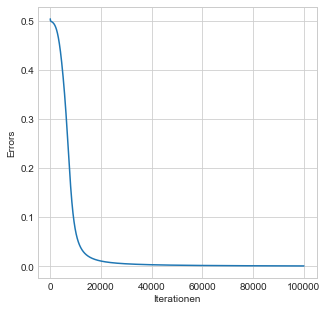

In [54]:
# Für die mathematischen Operationen numpy importieren
import numpy as np
# NEW
from sklearn.utils.validation import check_random_state
# Die Netzwerkklasse definieren
class MLP(object):
    # Die identische Funktion
    def func_id(self,x):
        return x
    # Eine weltberühmte Aktivierungsfunktion: Die Sigmoide
    def func_sigmoid(self,x):
        # Wichtig: Nicht math.exp sondern np.exp wegen array 
        # Operationen verwenden
        return 1.0 / (1.0 + np.exp(-x))
    def __init__(self, 
                 n_input_neurons=2,
                 n_hidden_neurons=2,
                 n_output_neurons=1,
                 weights=None,
                 # NEW 
                 eta=0.01,n_iterations=10,random_state=2, 
                 *args, **kwargs):
        """ Initialisierung des Netzwerkes.
        Wir verwenden eine fixe I-H-O Struktur für den Anfang 
             (Input-Hidden-Output)
        Die Anzahl der Neuronen ist flexibel
        Weiters ist es möglich das Netzwerk mit Gewichten 
            zu initialisieren[W_IH,W_HO]
        """
        # Anzahl der Neuronen pro Layer
        self.n_input_neurons=n_input_neurons
        self.n_hidden_neurons=n_hidden_neurons
        self.n_output_neurons=n_output_neurons
        # Gewichtsinitialisierung
        self.weights = weights
        W_IH=[]
        W_HO=[]
        # NEW Lernrate
        self.eta = eta
        # Iterationen
        self.n_iterations=n_iterations
        # NEW Zufallsgenerator
        self.random_state = random_state
        # NEW Erzeugung des Zufallsgenerators (RNG)
        self.random_state_ = check_random_state(self.random_state)
        # NEW Fehler beim fit       
        self.errors=[]        
        # Hier werden alle Daten zur Netzberechnung abgelegt
        self.network=[]
        # Input Layer + Bias Neuron: Spalten = n
        #   et_i, a_i, o_i,d_i,delta_i
        self.inputLayer = np.zeros((self.n_input_neurons+1,5))
        # Bias Neuron Output ist immer +1
        self.inputLayer[0] = 1.0 
        # Den Input Layer zum Netwerk hinzufügen
        self.network.append(self.inputLayer)
        # Weights von Input Layer zum Hidden Layer W_IH 
        # Neuron: Zeile x Spalten: 
        #   Zeilen = # Hidden, Spalten = # Input
        if weights:
            W_IH = self.weights[0]    
        else:
            # NEW
            W_IH = 2 * self.random_state_.random_sample(\
            (self.n_hidden_neurons+1,self.n_input_neurons+1)) - 1
        self.network.append(W_IH)
        # NEW Hidden Layer + Bias Neuron: 
        # Spalten = net_i,a_i,o_i,d_i,delta_i
        self.hiddenLayer = np.zeros((self.n_hidden_neurons+1,5))
        # Bias Neuron Output ist immer +1
        self.hiddenLayer[0] = 1.0 
        # Den Hidden Layer zum Netwerk hinzufügen
        self.network.append(self.hiddenLayer)
        # Weights von Hidden Layer zum Output Layer W_HO 
        # Neuron: Zeile x Spalten: 
        #   Zeilen = # Output, Spalten = # Hidden
        if weights:
            W_HO = self.weights[1]
        else:
            # NEW
            W_HO = 2 * self.random_state_.random_sample(\
            (self.n_output_neurons+1,self.n_hidden_neurons+1)) - 1
        self.network.append(W_HO)
        # NEW Output Layer + Bias Neuron: 
        # Spalten = net_i,a_i,o_i,d_i,delta_i 
        self.outputLayer = np.zeros((self.n_output_neurons+1,5))
        # Bias Neuron Output = 0, da nicht relevant. 
        # Nur wegen einheitlicher Indizierung vorhanden
        self.outputLayer[0] = 0.0 
        # Den Output Layer zum Netwerk hinzufügen
        self.network.append(self.outputLayer)

    def print(self):
        print('Multi Layer Perceptron - Netzwerk Architektur')
        # Nur drei Nachkommastellen ausgeben
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        for idx,nn_part in enumerate(self.network):
            print(nn_part)
            print('----------v----------')  
            
    def predict(self,x):
        """ Für Eingabe x wird Ausgabe y berechnet.
        """
        ###############
        # Input Layer
        # Die inputs setzen: Alle Zeilen, Spalte 2
        self.network[0][:,2] = x
        ###############
        # Hidden Layer
        # Start von Zeile 1 wegen Bias Neuron auf Index Position 0
        # net_j = W_ij . x
        self.network[2][1:,0] = np.dot(self.network[1][1:,:],\
                                       self.network[0][:,2])
        # a_j
        self.network[2][1:,1] = self.func_sigmoid(\
                                       self.network[2][1:,0]) 
        # o_j
        self.network[2][1:,2] = self.func_id(self.network[2][1:,1]) 
        # NEW der_j = a_j*(1-a_j) Ableitung für sigmoide
        self.network[2][1:,3] = self.network[2][1:,2] \
                                * ( 1.0 - self.network[2][1:,2])
        ###############
        # Output Layer
        # Start von Zeile 1 wegen Bias Neuron auf 0
        # net_k = = W_jk . h
        self.network[4][1:,0] = np.dot(self.network[3][1:,:],\
                                       self.network[2][:,2])
        # a_k
        self.network[4][1:,1] = self.func_sigmoid(\
                                       self.network[4][1:,0]) 
        # o_k
        self.network[4][1:,2] = self.func_id(self.network[4][1:,1])
        # NEW der_k = a_k*(1-a_k) Ableitung für sigmoide
        self.network[4][1:,3] = self.network[4][1:,2] \
                                * ( 1.0 - self.network[4][1:,2])
        # Rückgabe Output Vektor
        return self.network[4][:,2]   
    
    def fit(self,X,Y):
        """ Lernen          
        """         
        # Gewichtsänderungen
        delta_w_jk = []
        delta_w_ij = []
        # Fehler
        self.errors = []
        # Alle Iterationen
        for iteration in range(self.n_iterations):
            # Für alle Trainingsbeispiele
            error = 0.0
            #for xIdx,x in enumerate(X):
            for x,y in zip(X,Y):    
                #####################
                # Vorwärtspfad
                y_hat = self.predict(x)
                # Differenz
                diff = y - y_hat
                # Quadratischer Fehler
                error += 0.5 * np.sum(diff * diff)
                
                #####################
                # Output Layer
                # delta_k in der Output Schicht = der_k * e_k
                self.network[4][:,4] = self.network[4][:,3]*diff
                
                #####################
                # Hidden Layer
                # delta_j in der Hidden Schicht = 
                #   der_j * dot(W_kj^T,delta_k)
                self.network[2][:,4] = \
                             self.network[2][:,3] * \
                             np.dot(self.network[3][:].T,\
                                    self.network[4][:,4])                 
                
                #####################
                # Gewichtsdeltas von W_kj
                # delta_w = eta * delta_k . o_j^T
                delta_w_jk = self.eta * \
                             np.outer(self.network[4][:,4],\
                                      self.network[2][:,2].T )
                # Gewichtsdeltas von W_ji
                # delta_w = eta * delta_j . o_i^T
                delta_w_ij = self.eta * \
                             np.outer(self.network[2][:,4],\
                                      self.network[0][:,2].T )
                
                #####################
                # Gewichte anpassen
                self.network[1][:,:] += delta_w_ij               
                self.network[3][:,:] += delta_w_jk
                
            # Sammeln des Fehlers für alle Beispiele    
            self.errors.append(error)

    def plot(self):
        """ Ausgabe des Fehlers      
            Die im Fehlerarray gespeicherten Fehler als Grafik ausgeben    
        """         
        # Figure Nummern Start
        fignr = 1
        # Druckgröße in inch
        plt.figure(fignr,figsize=(5,5))
        # Ausgabe Fehler als Plot
        plt.plot(self.errors)
        # Raster
        plt.style.use('seaborn-whitegrid')  
        # Labels
        plt.xlabel('Iterationen')
        plt.ylabel('Errors')

###########################
# Initialisierung der Trainingsbeispiele
X=np.array([[1.0,1.0,1.0],[1.0,0,1.0],[1.0,1.0,0],[1.0,0,0]])
Y=np.array([[0.0,0.0],[0.0,1.0],[0.0,1.0],[0.0,0.0]])
# Netzwerk initialisieren
nn = MLP(eta=0.03,n_iterations=100000,random_state=42)
                                                                        
# Trainieren des Netzes mit der fit Methode und Ausgabe nach dem Trainieren
nn.fit(X,Y)                        
nn.print()

# Error Ausgabe als Graph
nn.plot()
                                                                        
# Testen der Vorhersage des Trainings Datensatzes
print('Predict:')
for x,y in zip(X,Y):
    print('{} {} -> {}'.format(x,y[1],nn.predict(x)[1:2]))